In [1]:
%cd C:\Users\debie\Documents\anaconda_space

C:\Users\debie\Documents\anaconda_space


# Finding the Best Markets to Advertise In

Let's assume that we're working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets to advertise our product in.

We can try to search existing data that might be relevant for our purpose. One good candidate is the data from freeCodeCamp's 2017 New Coder Survey. freeCodeCamp is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv',  low_memory=False)
pd.set_option("display.max_columns", None)
survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

The survey ask the answerer some questions about themselves (age, gender, employement status, country...), then their field of interest in a job (back end programming, data science, game development...), what ressource did they used to learn progamming (podcast, online courses...)

As we mentioned earlier, most of the courses we offer are on web and mobile development, but we also cover many other domains, like data science, game development, etc.

Before starting to analyze the sample data we have, we need to clarify whether it's representative for our population of interest and it has the right categories of people for our purpose. So let's look into the column named 'JobRoleInterest'.

In [4]:
job_interest = survey['JobRoleInterest'].value_counts(normalize = True).rename_axis('Job interest').reset_index(name='percentage')
job_interest['percentage'] = job_interest['percentage'] * 100
job_interest.set_index('Job interest', inplace = True)
job_interest.head(10)

,percentage
Job interest,
Full-Stack Web Developer,11.770595
Front-End Web Developer,6.435927
Data Scientist,2.173913
Back-End Web Developer,2.030892
Mobile Developer,1.673341
Game Developer,1.630435
Information Security,1.315789
"Full-Stack Web Developer, Front-End Web Developer",0.915332
"Front-End Web Developer, Full-Stack Web Developer",0.800915


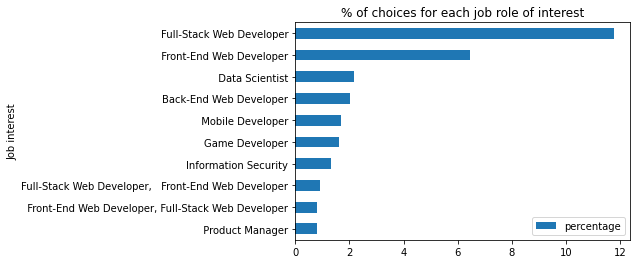

In [5]:
job_interest.head(10).plot.barh()
plt.gca().invert_yaxis()
plt.title("% of choices for each job role of interest")
plt.show()

We have shown the top 10 of job interests, and we can see that the sample data that we get from this survey is quite representative for our population of interest. Indeed, this interests cover most of the courses we offer.

Now that we found out that the sample has the right categories of people for our purpose, we can begin analyzing it. We can start with finding out where these new coders are located, and what are the densities (how many coders there are) for each location.

To do that, we'll look into the column 'CountryLive', but first we want to drop all the rows where a participant didn't answer what role they are interested in.

In [6]:
survey_country = survey[['JobRoleInterest','CountryLive']].copy()
survey_country.dropna(inplace = True)
survey_country.head()

,JobRoleInterest,CountryLive
1,Full-Stack Web Developer,United States of America
2,"Front-End Web Developer, Back-End Web Develo...",United States of America
3,"Front-End Web Developer, Full-Stack Web Deve...",Brazil
4,"Full-Stack Web Developer, Information Security...",Portugal
6,Full-Stack Web Developer,United Kingdom


In [7]:
country_freq = survey_country['CountryLive'].value_counts(normalize = True).rename_axis('country').reset_index(name='percentage')
country_freq['percentage'] = country_freq['percentage'] * 100
country_abs = survey_country['CountryLive'].value_counts().rename_axis('country').reset_index(name='absolute')
country_freq['absolute'] = country_abs['absolute']
country_freq.head(10)

,country,percentage,absolute
0,United States of America,45.700497,3125
1,India,7.721556,528
2,United Kingdom,4.606610,315
3,Canada,3.802281,260
4,Poland,1.915765,131
5,Brazil,1.886517,129
6,Germany,1.828020,125
7,Australia,1.637906,112
8,Russia,1.491664,102
9,Ukraine,1.301550,89


According to the results above, the 2 markets where we should advertize is the US and the Indian markets. But with the result of the US, it is wise to say that the investment should be bigger there.

Now we'll look into how much new learner are willing to spend on learning. We'll only look at the US, India, UK and Canada, as they are the top 4 of the last table and they all have a big amount of English speaking people in their population and the courses are in English.

We'll create a new column to see how much people are spending per month on learning. Some students answered that they had been learning to code for 0 months (it might be that they had just started when they completed the survey). To avoid dividing by 0, replace all the values of 0 with 1.

In [14]:
survey_money = survey.dropna(subset=["JobRoleInterest"]).copy()
survey_money['MonthsProgramming'] = survey_money['MonthsProgramming'].replace(0, 1)
survey_money['money_spent_monthly'] = survey_money['MoneyForLearning'] / survey_money['MonthsProgramming']
survey_money.dropna(subset=['money_spent_monthly','CountryLive'], inplace = True)
country_money = survey_money.groupby('CountryLive')['money_spent_monthly'].agg(['mean', 'median'])
country_money.loc[['United States of America','India','United Kingdom','Canada']]

,mean,median
CountryLive,,
United States of America,227.997996,3.333333
India,135.100982,0.000000
United Kingdom,45.534443,0.000000
Canada,113.510961,0.000000


The mean values of the money spent monthly show that the US are the best market to operate, and that India is also a good market. But the UK have a mean value lower than Canada. The results for the United Kingdom and Canada are surprisingly low relative to the values we see for India. If we considered a few socio-economical metrics (like GDP per capita), we'd intuitively expect people in the UK and Canada to spend more on learning than people in India.

The median values seems quite off as there are 3 country with a value of 0 and the US have it around 3.

Let's generate 4 box plots to visualize each country.

<AxesSubplot:xlabel='CountryLive', ylabel='money_spent_monthly'>

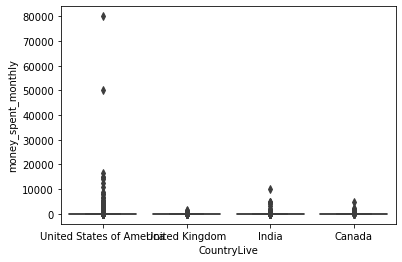

In [15]:
import seaborn as sns
survey_graph = survey_money[survey_money['CountryLive'].isin(["United States of America", "India" ,"United Kingdom", "Canada"])]

sns.boxplot(data = survey_graph, x="CountryLive", y="money_spent_monthly")


We can see that there are extreme outliers that we'll eliminate. For these let's define 200 $ as a maximum value of money spent per month.

<AxesSubplot:xlabel='CountryLive', ylabel='money_spent_monthly'>

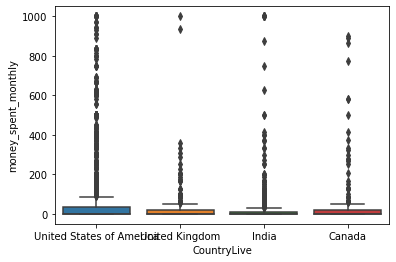

In [20]:
survey_graph = survey_graph[survey_graph['money_spent_monthly'] <= 2000]
survey_graph_ = survey_graph[survey_graph['CountryLive'].isin(["United States of America", "India" ,"United Kingdom", "Canada"])]

sns.boxplot(data = survey_graph_, x="CountryLive", y="money_spent_monthly")

There are still outliers, but we can see that the US is the bigger one, and Canada and UK are qite similar.

In [21]:
country_money_ = survey_graph.groupby('CountryLive')['money_spent_monthly'].agg(['mean', 'median'])
country_money_.loc[['United States of America','India','United Kingdom','Canada']]


,mean,median
CountryLive,,
United States of America,59.390462,2.083333
India,47.865239,0.000000
United Kingdom,32.080107,0.000000
Canada,46.934471,0.000000


From the table above, we can conclude that India is still a good market target. Furthermore, India has the highest population of the 4 countries studied here.